
# Adult Data Set

### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

Prediction task is to determine whether a person makes over 50K a year. 


Attribute Information:

Listing of attributes: 

>50K, <=50K. 

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

fnlwgt: continuous. 

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

education-num: continuous. 

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

sex: Female, Male. 

capital-gain: continuous. 

capital-loss: continuous. 

hours-per-week: continuous. 

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import *

Reading a datafile into a dataframe and assigning columns names to the dataframe.

In [2]:
h = ['age', 'workclass', "fnlwgt", "education", "education-num", "marital-status", "occupation","relationship", "race", "sex", "capital-gain", "capital-loss","hours-per-week", "native-country","Income"]
adult_df = pd.read_csv("adult.data", header= None, sep=',\s', na_values='?')
adult_df.head()
adult_df.columns = h

C:\Users\nitis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Checking for the null value columns.

In [3]:
adult_df.apply(lambda x:sum(x.isnull()),axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [4]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Handling Missing values

In [6]:
adult_df = adult_df.fillna({"workclass": "Unknown"})
adult_df = adult_df.fillna({"occupation": "Unknown"})
adult_df = adult_df.fillna({"native-country": "Unknown"})

In [7]:
adult_df.apply(lambda x:sum(x.isnull()),axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [8]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
split_percentage = 0.8
split = int(split_percentage*len(adult_df))

In [11]:
a = adult_df['native-country'].unique().tolist()
a.remove("United-States")
a

['Cuba',
 'Jamaica',
 'India',
 'Unknown',
 'Mexico',
 'South',
 'Puerto-Rico',
 'Honduras',
 'England',
 'Canada',
 'Germany',
 'Iran',
 'Philippines',
 'Italy',
 'Poland',
 'Columbia',
 'Cambodia',
 'Thailand',
 'Ecuador',
 'Laos',
 'Taiwan',
 'Haiti',
 'Portugal',
 'Dominican-Republic',
 'El-Salvador',
 'France',
 'Guatemala',
 'China',
 'Japan',
 'Yugoslavia',
 'Peru',
 'Outlying-US(Guam-USVI-etc)',
 'Scotland',
 'Trinadad&Tobago',
 'Greece',
 'Nicaragua',
 'Vietnam',
 'Hong',
 'Ireland',
 'Hungary',
 'Holand-Netherlands']

In [12]:
adult_df['native-country'].replace(a, 'Other',inplace=True)

In [13]:
# Train data set
adult_tr = adult_df[:split]
adult_tst = adult_df[split:]
adult_tr.shape

(26048, 15)

In [14]:
#for i in h:
  #  print(adult_df[i].unique())

Categorical Variables:
    - workclass
    - education
    - education-num
    - marital-status
    - occupation
    - relationship
    - race
    - sex
    - Income(Target Variable)

# 2. Data Analysis

In [15]:
# Univariate Analysis
# Gender and Income
adult_df['Income'] = adult_df['Income'].replace(['<=50K'], 0)
adult_df['Income'] = adult_df['Income'].replace(['>50K'], 1)

#print("\nMales <=50K", adult_df["Income"][adult_df["sex"] == 'Male'].value_counts()[0])
#print("Females <=50K", adult_df["Income"][adult_df["sex"] == 'Female'].value_counts()[0])
#print("Males >50K" ,adult_df["Income"][adult_df["sex"] == 'Male'].value_counts()[1])
#print("Females >50K" ,adult_df["Income"][adult_df["sex"] == 'Female'].value_counts()[1])
a = adult_df.shape
a[1]
num_vars = [var for var in range(0,a[1]) if adult_df.iloc[:,var].dtypes == 'int64']
num_vars

[0, 2, 4, 10, 11, 12, 14]

In [16]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,0


### a) Numerical Variables

Plotting the distribution curves for numerical variables to observe their distribution.

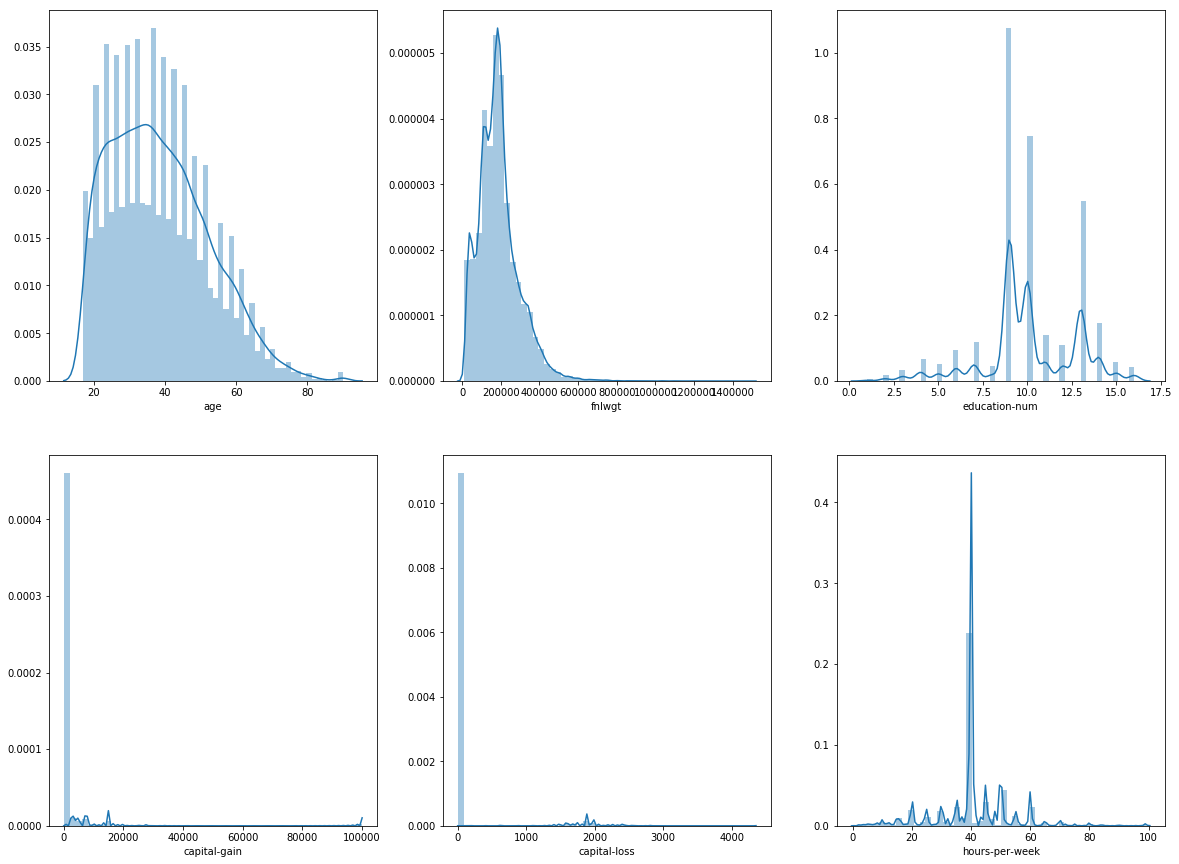

In [49]:
fig, ax = plt.subplots(2, 3, figsize=(20,15))
sns.distplot(adult_df["age"], ax=ax[0,0])
sns.distplot(adult_df["fnlwgt"], ax=ax[0,1])
sns.distplot(adult_df["education-num"], ax=ax[0,2])
sns.distplot(adult_df["capital-gain"], ax=ax[1,0])
sns.distplot(adult_df["capital-loss"], ax=ax[1,1])
sns.distplot(adult_df["hours-per-week"], ax=ax[1,2])

### b) Categorical Variables

Analysis of number of males and females in the dataset

[21790, 10771]
[24720, 7841]


([<matplotlib.patches.Wedge at 0x1eea8e002e8>,
 [Text(0.799948,-0.755039,'0'), Text(-0.799948,0.755039,'1')],
 [Text(0.436335,-0.411839,'75.92%'), Text(-0.436335,0.411839,'24.08%')])

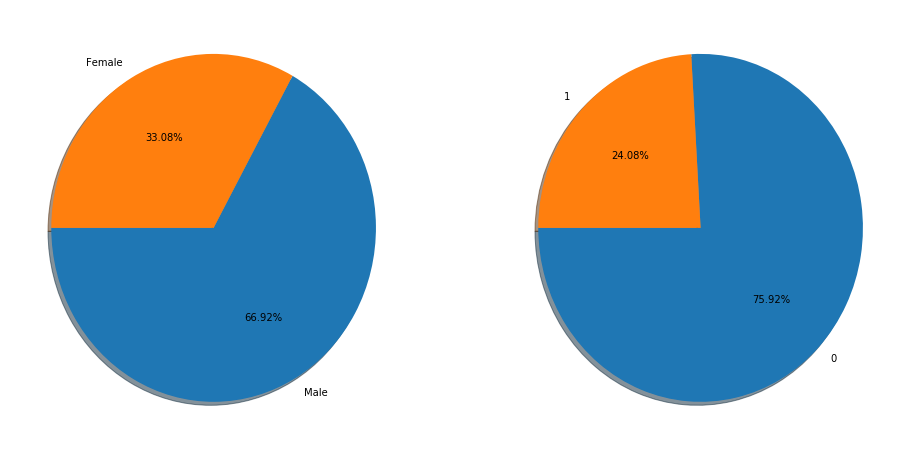

In [50]:
#fig1, ax1 = plt.subplots(1,2 , figsize=(20,15))
figure(1, figsize=(16,8), edgecolor='black')
ax1 = plt.subplot(1,2,1)
sex = adult_df["sex"].unique().tolist()
count_s = []
for i in adult_df["sex"].unique():
    count_s.append(adult_df["sex"].value_counts()[i])
print(count_s)
ax1.pie(count_s,labels = sex,shadow=True, startangle=180, radius=1, autopct='%.2f%%')

ax2 = plt.subplot(1,2,2)
cat_Inc = adult_df["Income"].unique().tolist()
count_i = []
for i in adult_df["Income"].unique():
    count_i.append(adult_df["Income"].value_counts()[i])
print(count_i)
ax2.pie(count_i,labels = cat_Inc,shadow=True, startangle=180, radius=1, autopct='%.2f%%')

Out of the complete dataset 33.08% are Females and 66.92% are males

Now Two Dataframes have been created so as to analyse the males and females seperately
 - 1st has the data of males
 - 2nd has the data for the females.

In [52]:
adult_m = adult_df.loc[adult_df["sex"] == 'Male']
adult_f = adult_df.loc[adult_df["sex"] == 'Female']

In [19]:
#adult_m.head()

In [20]:
#adult_f.head()

In [21]:
# Males

In [53]:
ct = pd.crosstab(adult_df['sex'], adult_df['Income'])
counts = adult_df['sex'].value_counts()

[9592, 1179]
[15128, 6662]


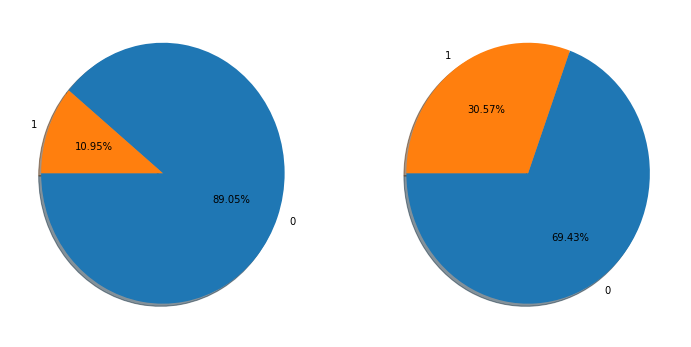

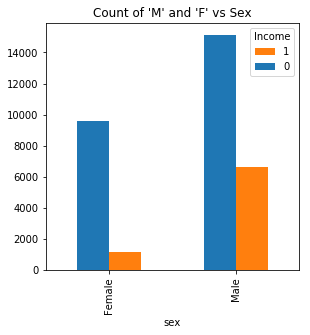

In [54]:
figure(1, figsize=(12,6), edgecolor='black')
#cat_Inc = adult_m["Income"].unique().tolist()
ax1 = plt.subplot(1,2,1)
count_f = []
for i in adult_f["Income"].unique():
    count_f.append(adult_f["Income"].value_counts()[i])
print(count_f)
plt.pie(count_f,labels = cat_Inc,shadow=True, startangle=180, radius=1, autopct='%.2f%%')

ax2 = plt.subplot(1,2,2)
count_m = []
for i in adult_m["Income"].unique():
    count_m.append(adult_m["Income"].value_counts()[i])
print(count_m)
plt.pie(count_m,labels = cat_Inc,shadow=True, startangle=180, radius=1, autopct='%.2f%%')


figure(2, figsize=(10,10), edgecolor='black')
ax3 = plt.subplot(2,2,3)
ct.plot(kind='bar',title="Count of 'M' and 'F' vs Sex",yticks=range(0,16000,2000),ax = ax3, subplots = False, legend='reverse')
#ax4 = plt.subplot(2,2,4)
#counts.plot(kind='bar',yticks=range(0,25000,2000),subplots = True, ax = ax4)

In [24]:
#Males

In [25]:
#Workclass vs Income

In [26]:
#adult_df.dtypes

In [55]:

cat_vars = [var for var in range(0,a[1]) if adult_df.iloc[:,var].dtypes == 'object']
print(cat_vars)
cat_vars.remove(9)
print(cat_vars)

[1, 3, 5, 6, 7, 8, 9, 13]
[1, 3, 5, 6, 7, 8, 13]


In [28]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,0


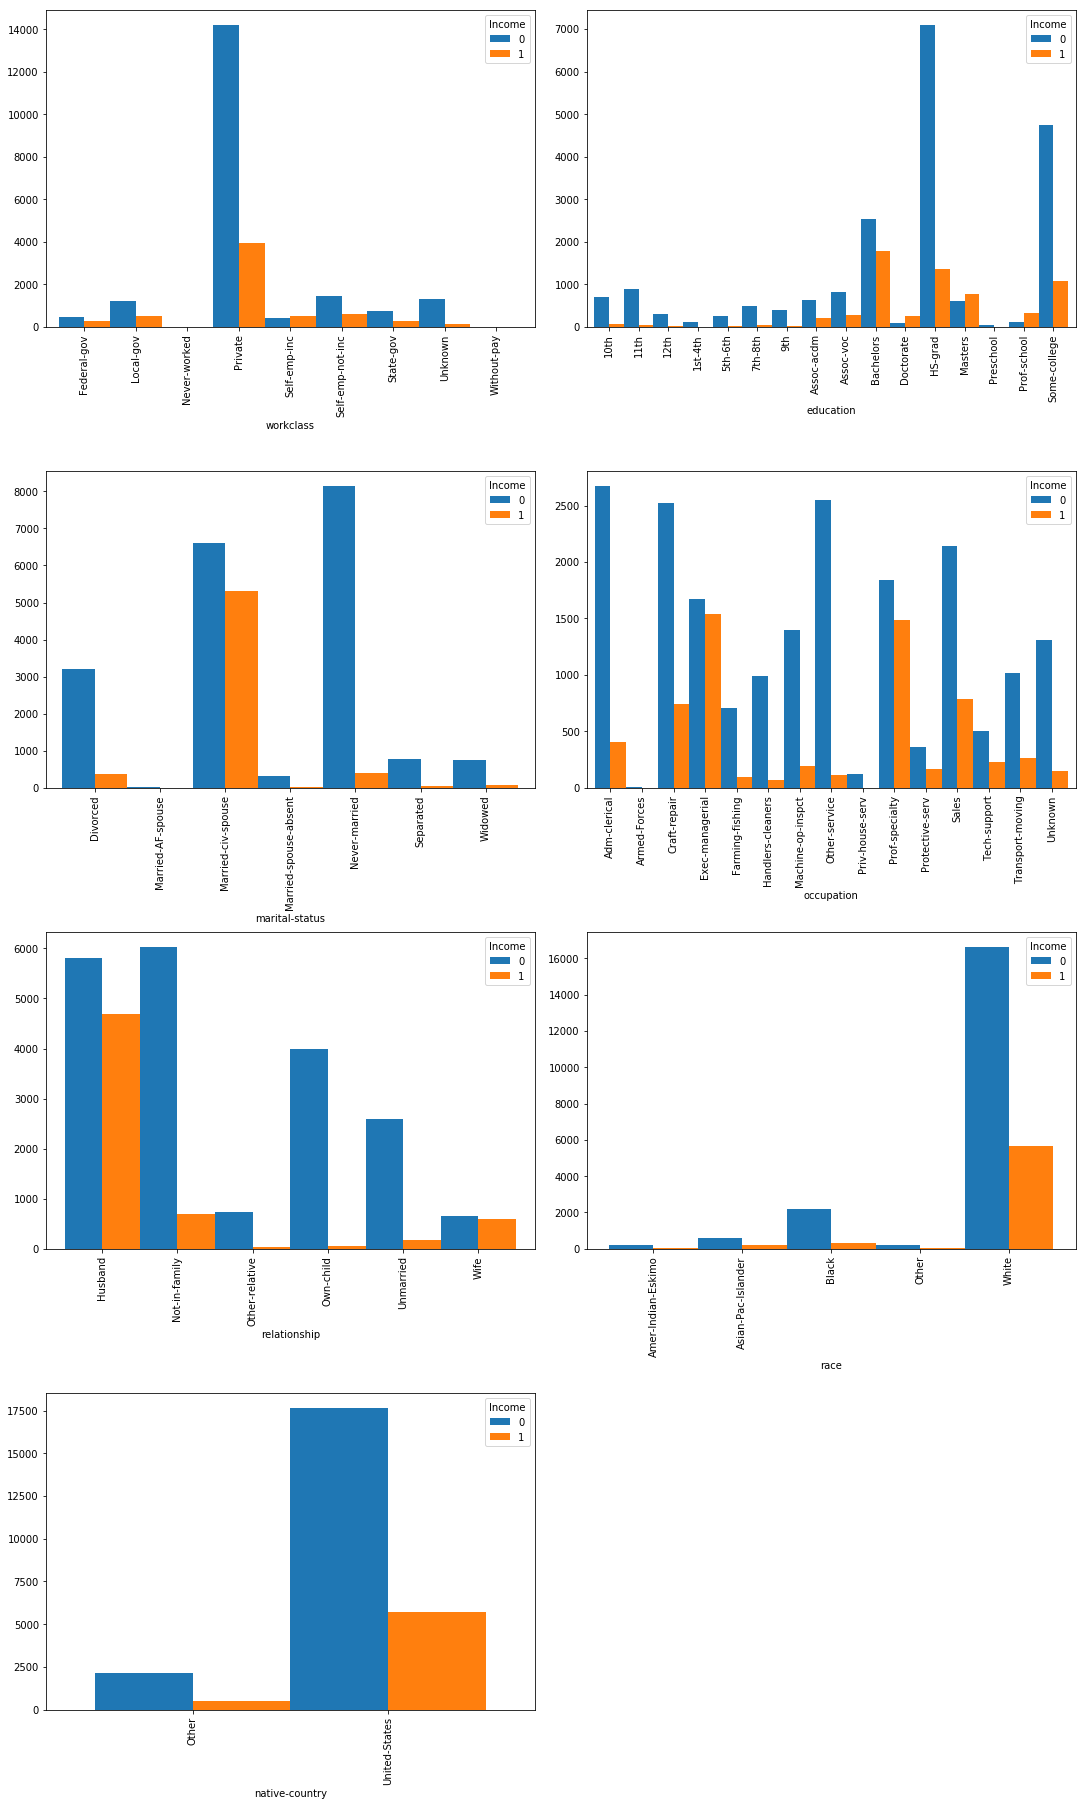

In [29]:
fig1 = figure(1,figsize=(15,25))
#print (adult_df.iloc[:,5])
width1 = 1

z = 1
for k in cat_vars:
    axf = plt.subplot(4,2,z)
    ctf = pd.crosstab(adult_tr.iloc[:,k], adult_tr.iloc[:,14])
    ctf.plot(kind='bar', ax=axf,width= width1)
    z = z + 1
    
plt.tight_layout(pad=0.4,h_pad=0.5,w_pad=1)

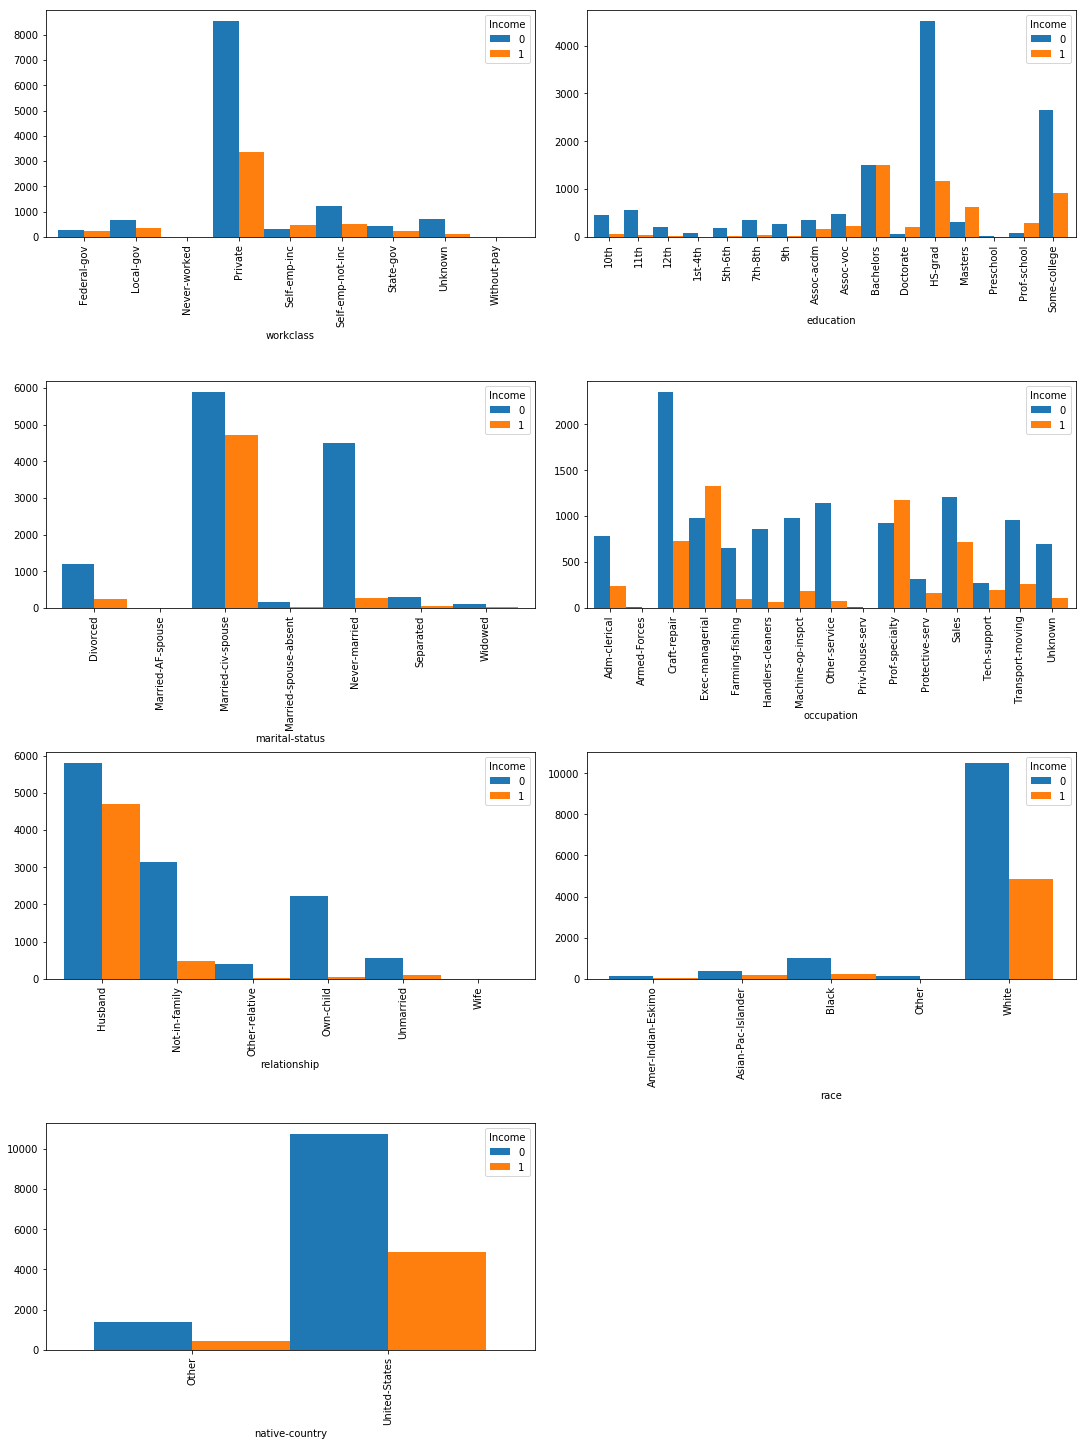

In [30]:
fig2 = figure(1,figsize=(15,20))
#print (adult_df.iloc[:,5])
x = 1
for i in cat_vars:
    axm = plt.subplot(4,2,x)
    ctm = pd.crosstab(adult_m.iloc[:,i], adult_m.iloc[:,14])
    ctm.plot(kind='bar', ax=axm, width= width1)
    x = x + 1
    
plt.tight_layout(pad=0.4,h_pad=0.5,w_pad=1)

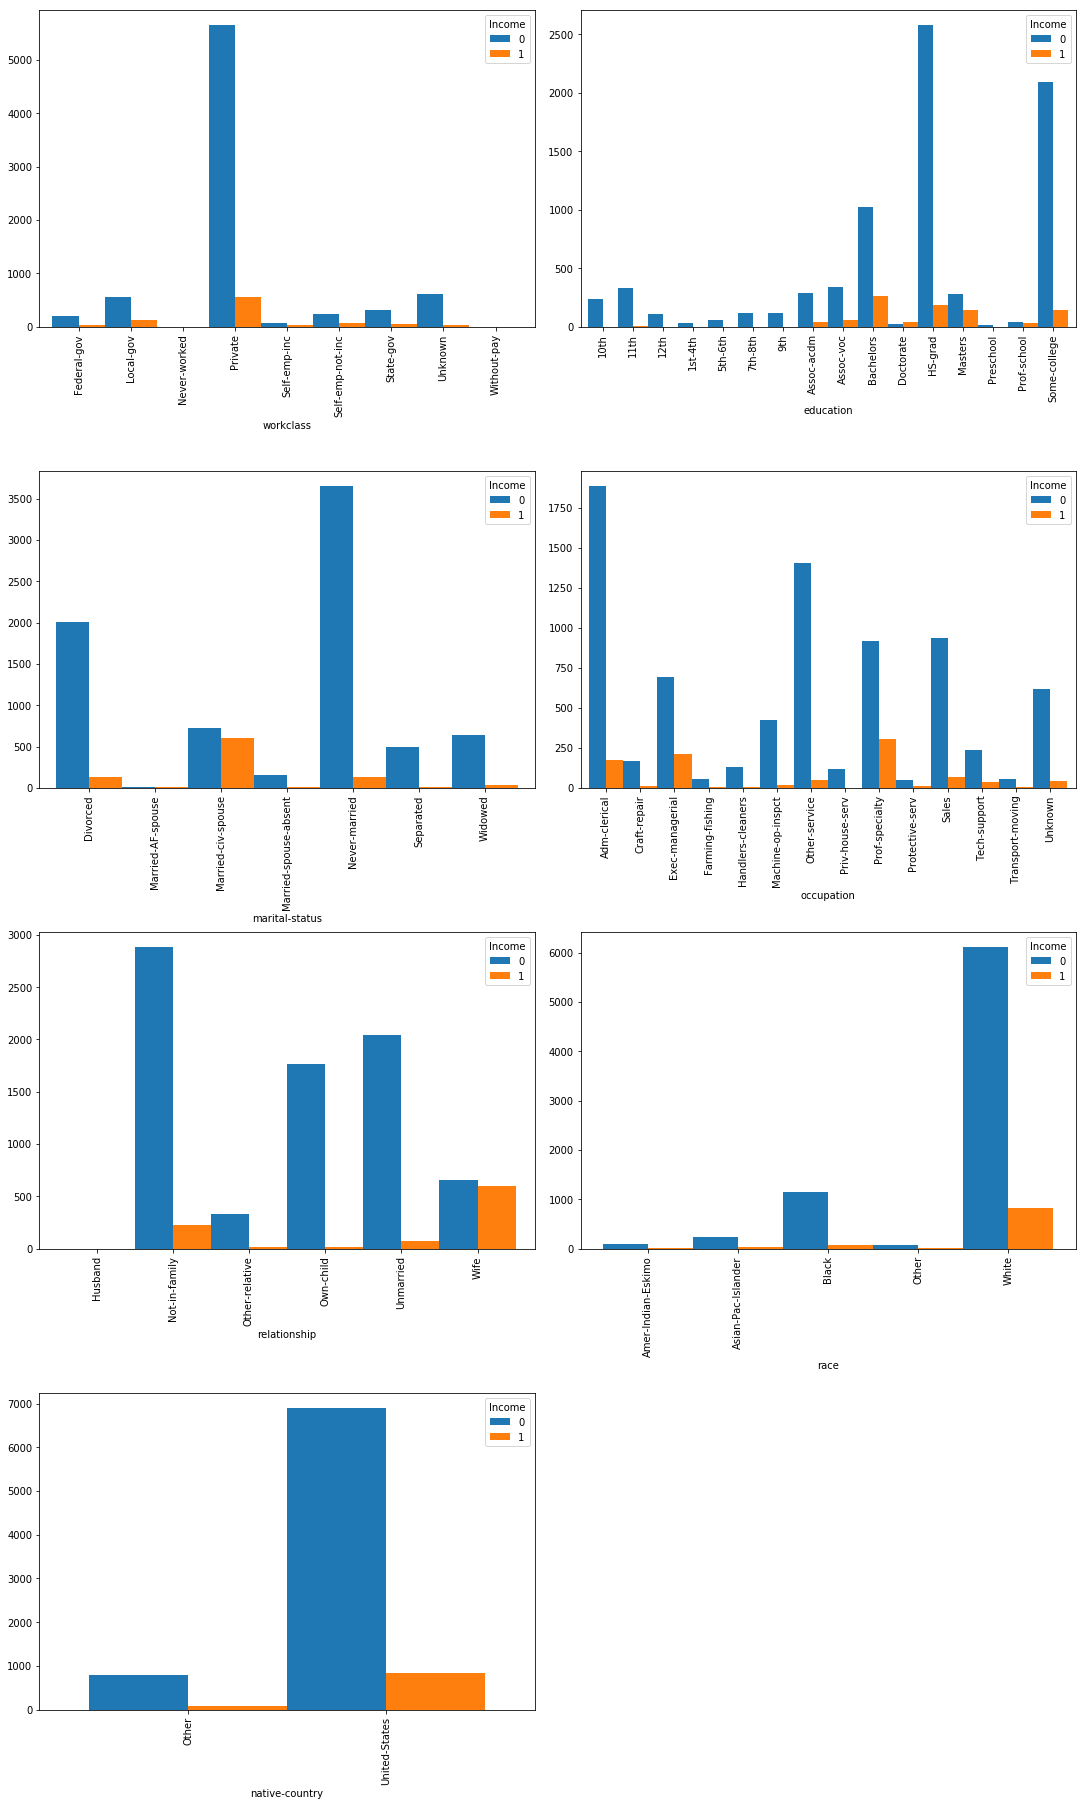

In [31]:
fig3 = figure(1,figsize=(15,25))
#print (adult_df.iloc[:,5])

y = 1
for j in cat_vars:
    axf = plt.subplot(4,2,y)
    ctf = pd.crosstab(adult_f.iloc[:,j], adult_f.iloc[:,14])
    ctf.plot(kind='bar', ax=axf,width= width1)
    y = y + 1
    
plt.tight_layout(pad=0.4,h_pad=0.5,w_pad=1)

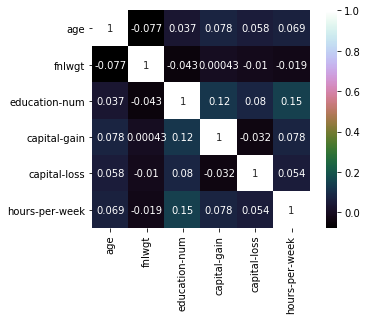

In [32]:
#as1 = pd.crosstab(adult_df['age'], adult_df['capital-gain'])
#as1
#counts1 = adult_df['sex'].value_counts()
#as1.plot(x= "age", y="capital-gain", kind='scatter')
corr_mat = adult_df.corr()
adult_df.plot(x= "age", y="hours-per-week", kind='scatter')
sns.heatmap(corr_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

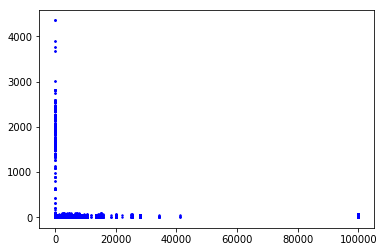

In [58]:
plt.scatter(adult_df['capital-gain'], adult_df['capital-loss'], c='blue', s=2)
plt.scatter(adult_df['capital-gain'], adult_df['hours-per-week'], c='blue', s=2)
#plt.scatter(adult_df['capital-gain'], adult_df['capital-loss'], c='blue', s=2)

#plt.scatter(adult_df[cluster==1,0], adult_df[cluster==1,1], c='red', s=s)
#plt.scatter(adult_df[cluster==2,0], adult_df[cluster==2,1], c='green', s=s)
#plt.scatter(adult_df[cluster==3,0], adult_df[cluster==3,1], c='cyan', s=s)

In [56]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,0


In [33]:
adult_tr.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Other,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [34]:
cat_v = adult_tr.select_dtypes(include=['object'])
cat_v.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [35]:
for var in cat_v.columns:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(adult_tr[var], prefix=var)
    data1=adult_tr.join(cat_list)
    adult_tr = data1

adult_tr.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Other,native-country_United-States
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,0,0,0,0,1,0,1,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,1,0,1,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,0,0,0,0,1,0,1,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,0,0,1,0,0,0,1,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,1,0,0,1,0,0,1,0,1,0


In [36]:
data_vars=adult_tr.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_v.columns]
len(to_keep)

69

In [37]:
print(len(list(adult_tr.columns)))

77


In [38]:
data_final=adult_tr[to_keep]
cols = data_final.columns.values
type(cols)
cols[6]
cols = np.delete(cols,6)
len(cols)

68

In [39]:
data_final_vars=data_final.columns.values.tolist()
y=['Income']
X=[i for i in cols if i not in y]
data_final_vars.remove("Income")
len(data_final_vars)

68

In [40]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)
ab = rfe.support_

C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False  True False False  True  True False False  True  True False False
 False False False False False  True False  True False  True  True  True
 False  True  True False False False False  True  True False  True False
 False False  True False  True False False False]
[44 47 19 46 45 42  6 31 50 22  8 48 49 32  1 30 23 25 39 36 29 24 18 26 41
  1 27 20  1  1 28 15  1  1 14  9 13 16 37 51 43  1  5  1 10  1  1  1  4  1
  1 38 11 21 40  1  1 12  1  7 34 33  1 35  1 17  2  3]


In [41]:
cols = cols[ab].tolist()
cols

['workclass_Without-pay',
 'education_Doctorate',
 'education_Preschool',
 'education_Prof-school',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'occupation_Exec-managerial',
 'occupation_Handlers-cleaners',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Sales',
 'occupation_Tech-support',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Wife',
 'race_Other',
 'sex_Female']

In [42]:
X=data_final[cols]
y=data_final['Income']

In [43]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

C:\Users\nitis\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


         Current function value: 0.449091
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Income   No. Observations:                26048
Model:                          Logit   Df Residuals:                    26030
Method:                           MLE   Df Model:                           17
Date:                Thu, 29 Mar 2018   Pseudo R-squ.:                  0.1844
Time:                        20:57:20   Log-Likelihood:                -11698.
converged:                      False   LL-Null:                       -14342.
                                        LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
workclass_Without-pay               -78.0700   4.85e+16  -1.61e-15      1.000    -9.5e+16     9.5e

C:\Users\nitis\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [44]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [46]:
#Import Library
#Import other necessary libraries like pandas, numpy...
from sklearn import tree
#Assumed you have, X (predictor) and Y (target) for
#training data set and x_test(predictor) of
#test_dataset
#Create tree object
model = tree.DecisionTreeClassifier(criterion='gini')
#for classification, here you can change the
#algorithm as gini or entropy (information gain) by
#default it is gini
#model = tree.DecisionTreeRegressor() for
#regression
#Train the model using the training sets and check
#score


In [48]:
model.fit(X, y)

#Predict Output
predicted= model.predict(X_test)

In [57]:
model.score(X, y)*100

82.17521498771498

In [50]:
predicted= model.predict(X_test)

In [56]:
predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)